# <b>Software Requirements:</b>
<ul>
<li><b>Python</b> (3.6 or later)</li>
<li><b>Necessary libraries:</b> pandas, numpy, scikit-learn and matplotlib (install using: pip install pandas numpy scikit-learn matplotlib)</li></ul>

## <b>Data Acquisition</b>

Publicly available dataset from the OpenML Repository's Heart Disease dataset (https://www.openml.org/search?type=data&sort=runs&id=43823&status=active).

# <b>1. Import Modules for Data Analysis and Load Data:<b>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Load the heart disease data
data = pd.read_csv("HEART DISEASE PREDICTION USING LOGISTIC REGRESSION.csv")


<ul>
<li><b>pandas:</b> Used for data manipulation and analysis.</li>
<li><b>scikit-learn:</b> Provides machine learning tools.</li>
<li><b>train_test_split:</b> Splits data into training and testing sets.</li>
<li><b>LogisticRegression:</b> Implements the logistic regression algorithm.</li>
<li><b>heart.csv:</b> Replace with the actual path to your downloaded dataset.</li></ul>

# <b>2. Data Exploration and Preprocessing:</b>
<ul>
    <li>
        <h3>
            <b>
                <i>Get basic information about data:</i>
            </b>
        </h3>
    </li>
</ul>

In [2]:
print(data.head())  # View the first few rows
print(data.info())  # Check data types and missing values

   Age  Sex  Chest_pain_type   BP  Cholesterol  FBS_over_120  EKG_results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max_HR  Exercise_angina  ST_depression  Slope_of_ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number_of_vessels_fluro  Thallium Heart_Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

<ul>
<li><b>head():</b> Displays the first few rows of the data.</li>
<li><b>info():</b> Provides information about data types and missing values.</li>

<ul>
    <li>
        <h3>
            <b>
                <i>Handle missing values: (Imputation techniques or removal of missingness)</i>
            </b>
        </h3>
    </li>
</ul>

In [3]:
data = data.dropna()  # Remove rows with missing values

<ul>
    <li>
        <h3>
            <b>
                <i>Explore individual features with histograms and countplots</i>
            </b>
        </h3>
    </li>
</ul>

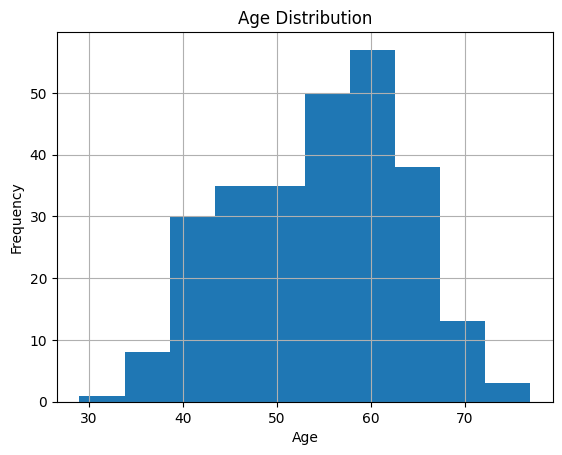

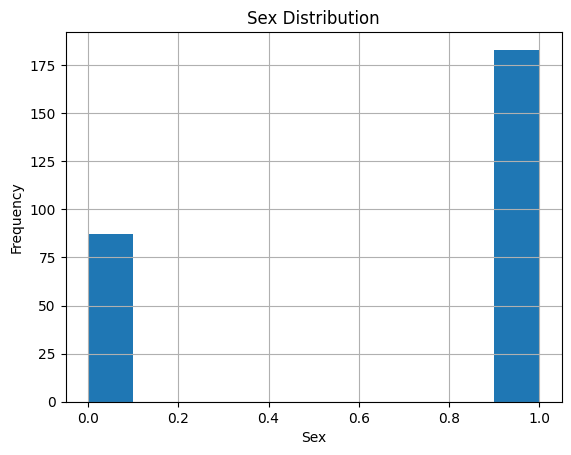

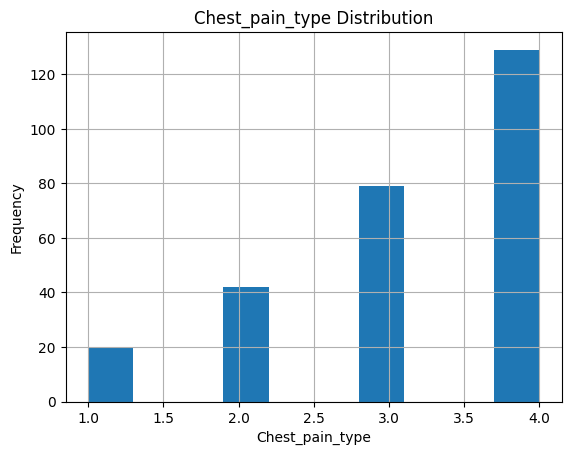

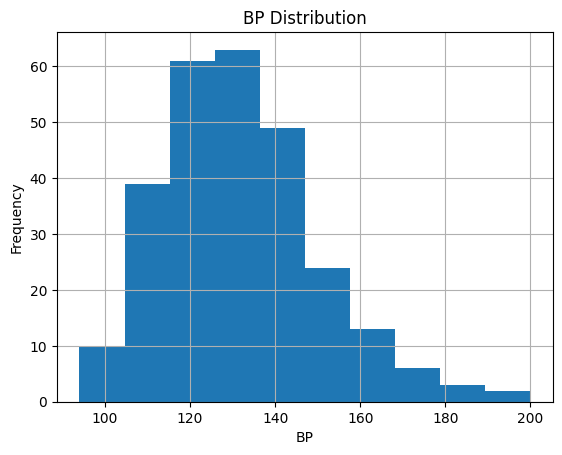

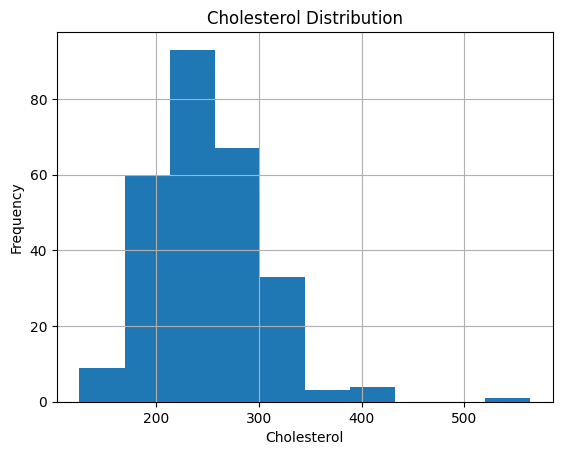

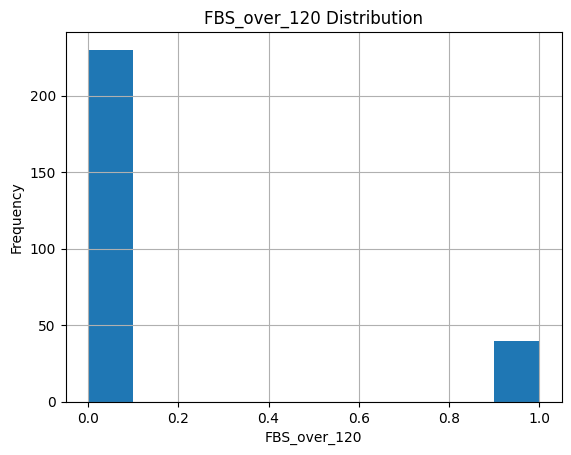

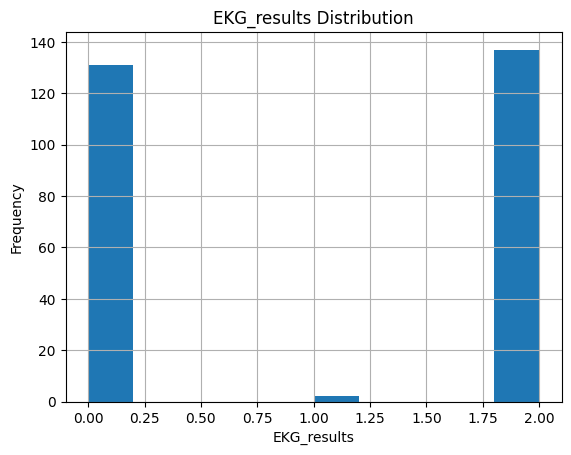

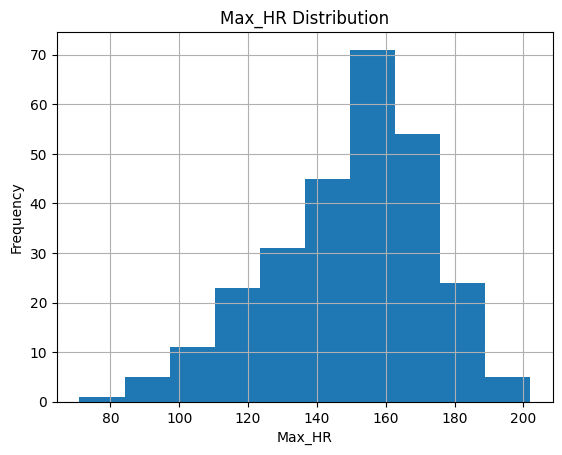

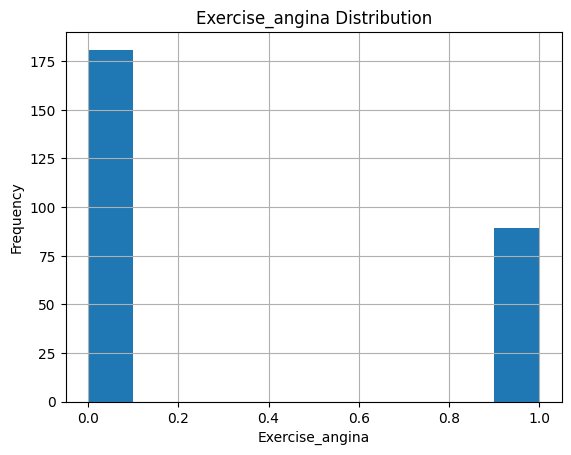

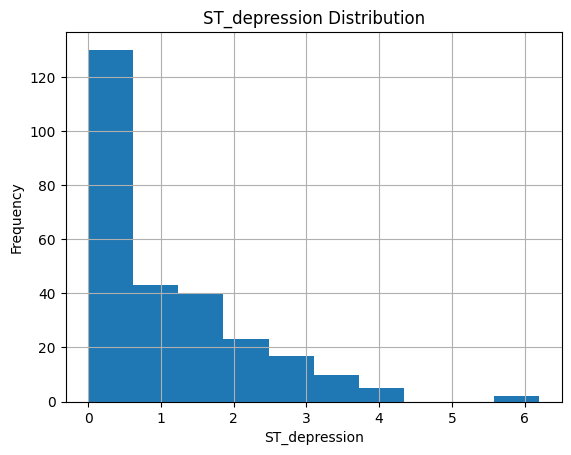

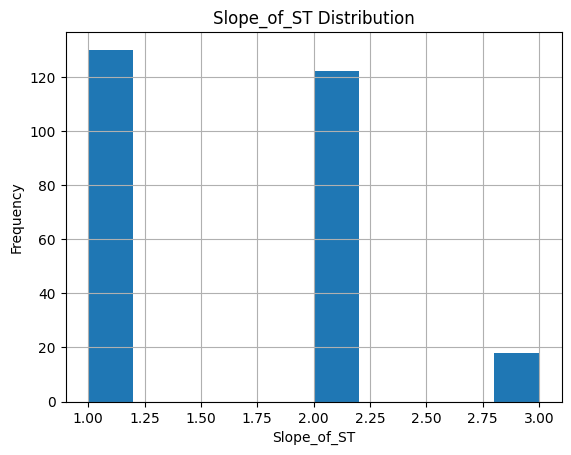

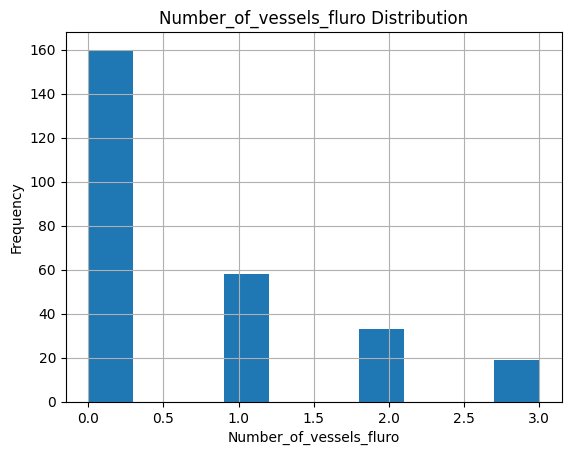

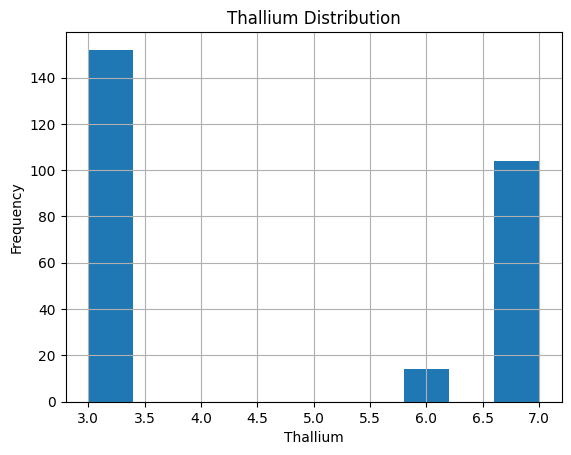

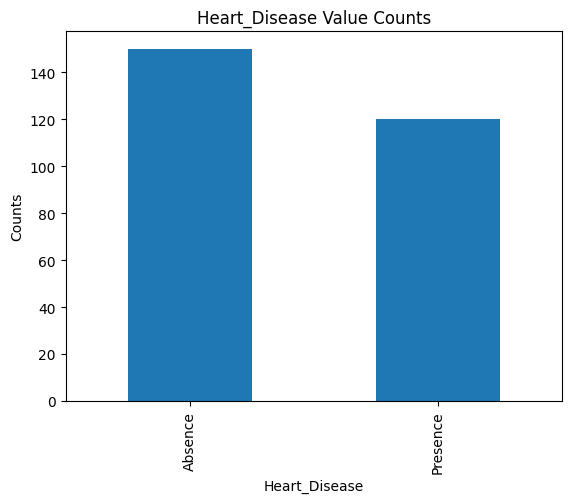

In [4]:
for col in data.columns:
    if data[col].dtype == object:
        data[col].value_counts().plot(kind="bar")
        plt.title(col + " Value Counts")
        plt.xlabel(col)
        plt.ylabel("Counts")
        plt.show()
    else:
        data[col].hist()
        plt.title(col + " Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

<ul>
    <li>
        <h3>
            <b>
                <i>Encode categorical features:</i>
            </b>
        </h3>
    </li>
</ul>

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features (e.g., Heart_Disease)
le = LabelEncoder()
data["Heart_Disease"] = le.fit_transform(data["Heart_Disease"])

<ul>
<li><b>LabelEncoder:</b> Converts categorical labels into numerical values.
<li><b>fit_transform:</b> Fits the encoder to the data and transforms the column.
</ul>

In [6]:
## After encoding the Heart_Disease in to the INTEGER datatype
print(data['Heart_Disease'].head())

0    1
1    0
2    1
3    0
4    0
Name: Heart_Disease, dtype: int32


<ul>
    <li>
        <h3>
            <b>
                <i>Explore relationships between features with correlation matrix</i>
            </b>
        </h3>
    </li>
</ul>

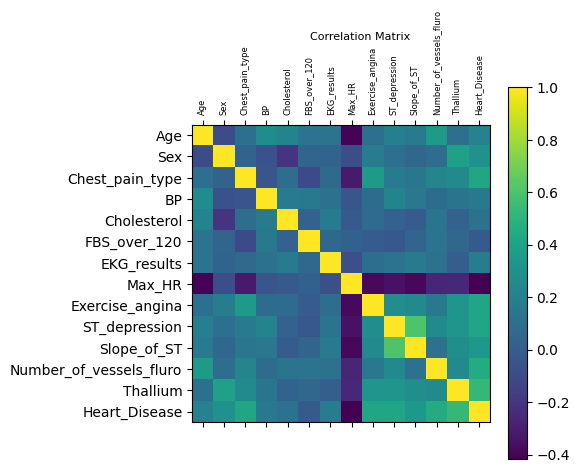

                              Age       Sex  Chest_pain_type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest_pain_type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS_over_120             0.123458  0.042140        -0.098537  0.155681   
EKG_results              0.128171  0.039253         0.074325  0.116157   
Max_HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise_angina          0.098297  0.180022         0.353160  0.082793   
ST_depression            0.194234  0.097412         0.167244  0.222800   
Slope_of_ST              0.159774  0.050545         0.136900  0.142472   
Number_of_vessels_fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.3

In [7]:
correlation = data.corr()

# Visualize relationships with heatmap
plt.matshow(correlation)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90, fontsize=6)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar()
plt.suptitle("Correlation Matrix", fontsize=8)
plt.show()
print(correlation)

### <b>Factors that does not much affect the patients causing Heart Diseases</b>

In [8]:
# relation falling greater than 30%
print(correlation > 0.3)

                           Age    Sex  Chest_pain_type     BP  Cholesterol  \
Age                       True  False            False  False        False   
Sex                      False   True            False  False        False   
Chest_pain_type          False  False             True  False        False   
BP                       False  False            False   True        False   
Cholesterol              False  False            False  False         True   
FBS_over_120             False  False            False  False        False   
EKG_results              False  False            False  False        False   
Max_HR                   False  False            False  False        False   
Exercise_angina          False  False             True  False        False   
ST_depression            False  False            False  False        False   
Slope_of_ST              False  False            False  False        False   
Number_of_vessels_fluro   True  False            False  False   

### <strong>Features that does not participate in the higher correlation between them and with the Heart_Disease target variable:</strong>
##### <b>Age, Sex, BP, Cholesterol, FBS_over_120, EKG_results, Max_HR<b>

<ul>
    <li>
        <h3>
            <b>
                <i>After removing the unnecessary factors that does not may affect the heart disease</i>
            </b>
        </h3>
    </li>
</ul>


In [9]:
data = data.drop(['Age', 'Sex', 'BP', 'Cholesterol', 'FBS_over_120', 'EKG_results', 'Max_HR'], axis=1)
print(data.head())

   Chest_pain_type  Exercise_angina  ST_depression  Slope_of_ST  \
0                4                0            2.4            2   
1                3                0            1.6            2   
2                2                0            0.3            1   
3                4                1            0.2            2   
4                2                1            0.2            1   

   Number_of_vessels_fluro  Thallium  Heart_Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0  


### <b>Factors that have higher correlation and may affect the patients causing Heart Diseases</b>

In [10]:
print(correlation >=0.5)

                           Age    Sex  Chest_pain_type     BP  Cholesterol  \
Age                       True  False            False  False        False   
Sex                      False   True            False  False        False   
Chest_pain_type          False  False             True  False        False   
BP                       False  False            False   True        False   
Cholesterol              False  False            False  False         True   
FBS_over_120             False  False            False  False        False   
EKG_results              False  False            False  False        False   
Max_HR                   False  False            False  False        False   
Exercise_angina          False  False            False  False        False   
ST_depression            False  False            False  False        False   
Slope_of_ST              False  False            False  False        False   
Number_of_vessels_fluro  False  False            False  False   

<h2>
    <b>
        <i>The strong relation between the feautures which may affect another feature is:</i>
        <ol>
            <li>
                <h4>
                ST_depression and Slope_of_ST
                </h4>
            </li>
            <li>
                <h4>
                Thallium and Heart_Disease
                </h4>
            </li>
        </ol>
    </b>
</h2>
<h3>
    <strong>NOTE:</strong> Thallium is only the one variable which have the highest correlation with Heart_Disease target variable.
</h3>

<ul>
    <li>
        <h3>
            <b>
                <i>Feature scaling: (standardization)</i>
            </b>
        </h3>
    </li>
</ul>

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize features (consider normalization as well)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop("Heart_Disease", axis=1))
print("An Array of the scaled data:\n\n", data_scaled)
# Combine scaled features with target variable
data_prepared = pd.DataFrame(data_scaled, columns=data.columns[:-1])
print("\n\nAfter putting scaled data into the dataframe without heart disease:\n\n", data_prepared.head());
data_prepared["Heart_Disease"] = data["Heart_Disease"]
print("\n\nScaled data for the further processing like training and testing on dataset with the heart disease:\n\n", data_prepared.head());

An Array of the scaled data:

 [[ 0.87092765 -0.7012223   1.18101235  0.67641928  2.47268219 -0.87570581]
 [-0.18355874 -0.7012223   0.48115318  0.67641928 -0.71153494  1.18927733]
 [-1.23804513 -0.7012223  -0.65611797 -0.95423434 -0.71153494  1.18927733]
 ...
 [-1.23804513 -0.7012223   0.21870599  0.67641928 -0.71153494 -0.87570581]
 [ 0.87092765 -0.7012223  -0.56863558  0.67641928 -0.71153494  0.67303154]
 [ 0.87092765  1.4260813   0.39367078  0.67641928  2.47268219 -0.87570581]]


After putting scaled data into the dataframe without heart disease:

    Chest_pain_type  Exercise_angina  ST_depression  Slope_of_ST  \
0         0.870928        -0.701222       1.181012     0.676419   
1        -0.183559        -0.701222       0.481153     0.676419   
2        -1.238045        -0.701222      -0.656118    -0.954234   
3         0.870928         1.426081      -0.743600     0.676419   
4        -1.238045         1.426081      -0.743600    -0.954234   

   Number_of_vessels_fluro  Thallium  

<ul>
<li><b>StandardScaler:</b> Standardizes features by removing the mean and scaling to unit variance.
<li><b>fit_transform:</b> Fits the scaler and transforms the data.
<li><b>data.drop("target", axis=1):</b> Drops the target variable ("Heart_Disease") from the data.</li>
</ul>

# <b>3. Split Data into Training and Testing Sets:</b>

In [12]:
X = data_prepared.drop(["Heart_Disease"], axis=1) ## axis=1 means column and axis=0 means row independently
y = data_prepared["Heart_Disease"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)


<ul>
<li><b>train_test_split:</b> Splits data into training and testing sets.
<li><b>X:</b> Feature matrix.
<li><b>y:</b> Target variable.</li>
<li><b>test_size:</b> Proportion of data for the testing set (20% in this case).</li>
<li><b>random_state:</b> Ensures reproducibility (set a seed value).</li>
</ul>

# <b>4. Train the Logistic Regression Model:</b>

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

<ul>
<li><b>LogisticRegression:</b> Creates a logistic regression classifier object.
<li><b>fit:</b> Trains the model on the training data.</li>
</ul>

# <b>5. Evaluate the Model:</b>

In [14]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


<ol type="1">
    <li><b>Import Metrics:</b></li>
    <ul>
        <li>from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score: This line imports the necessary functions from the sklearn.metrics module to calculate various evaluation metrics for classification models.</li>
    </ul>

<li><b>Prediction:</b></li>
<ul>
    <li>y_pred = model.predict(X_test): This line uses the trained logistic regression model (model) to make predictions on the unseen testing data (X_test). The predicted labels are stored in the y_pred variable.</li>
</ul>
<li><b>Evaluation Metrics Calculation:</b></li>
<ul>
    <li>accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy, which is the proportion of correct predictions made by the model.</li>
</ul>
<li><b>Printing Results:</b></li>
<ul><li>The calculated metrics (accuracy, precision, recall, F1 score) are printed to the console along with descriptive labels.</li></ul>
</ol>